## task 11.1: preparation

In [27]:
import numpy as np
import networkx as nx
import numpy.random as rnd
import string
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

def tnc(data):
    """ To Normal Coordinates"""
    if len(data.shape) > 1:
        data = data[:,1],data[:,0],data[:,2]
    else:
        data = data[1],data[0],data[2]
    return data

def plot(data):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(*tnc(data), marker='o')
    plt.show()

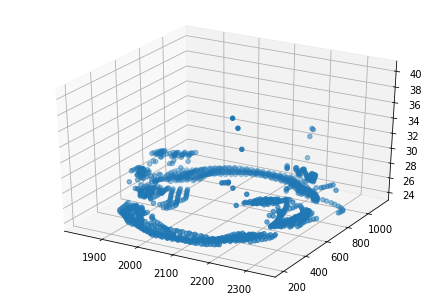

In [29]:
matX1 = np.genfromtxt('../data/q3dm1-path1.csv',delimiter=',')
plot(matX1)

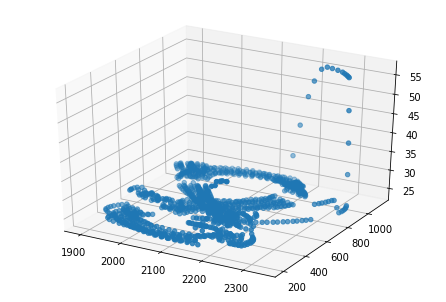

In [26]:
matX2 = np.genfromtxt('../data/q3dm1-path2.csv',delimiter=',')
plot(matX2)

## task 11.2: fitting self-organizing maps

In [4]:
def initRingSOM(matX, k):
    G = nx.generators.lattice.grid_2d_graph(k, 1, periodic=True)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(m, k, replace=False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[smpl[i],:]
    return G


def trainSOM(matX, G, tmax=1000, sigma0=1., eta0=1.):
    m, n = matX.shape
    # compute matrix of squared path length distances between neurons
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    #
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    # a list of tmax random indices into the columns of matrix X
    smpl = rnd.randint(0, m, size=tmax)
    for t in range(tmax):
        # sample a point x, i.e. a row of matrix X
        vecX = matX[smpl[t],:]
        # determine the best matching unit
        b = np.argmin([np.sum((G.nodes[v]['w'] - vecX)**2) for v in G])
        # update the learning rate
        eta = eta0 * (1. - t/tmax)
        # update the topological adaption rate
        sigma = sigma0 * np.exp(-t/tmax)
        # update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5 * matD[b,i] / sigma**2)
            G.nodes[v]['w'] += eta * h * (vecX - G.nodes[v]['w'])
    return G

In [5]:
G = initRingSOM(matX1, 15)
SOM1 = trainSOM(matX1, G, tmax=10000)

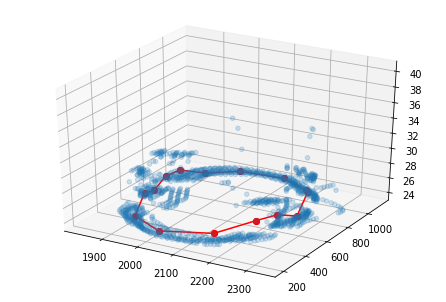

In [20]:
def plot_SOM_on_data(data, graph, SOM_color='red', data_color=None):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(*tnc(data), color=data_color, alpha=0.2)
    for u, v in graph.edges():
        dot1 = tnc(graph.nodes[u]['w'])
        dot2 = tnc(graph.nodes[v]['w'])
        edge = np.array([dot1, dot2]).T
        ax.plot(*edge, '-o', color=SOM_color)
    plt.show()

plot_SOM_on_data(matX1, SOM1)